In [9]:
from pandas import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from matplotlib import pyplot as plt
import plotly.express as px
import math

In [3]:
df_APPA1 = read_csv("../data/APPA1.csv")
df_APPA1.rename(columns = {"Time":"ts"}, inplace = True)
#df_APPA1 = pd.to_datetime(df_APPA1["ts"])
#print(type(df_APPA1))
df_APPA1 = df_APPA1.set_index("ts")
print(df_APPA1)

                     PM10  Biossido di Azoto  Biossido Zolfo  Ozono PM2.5
ts                                                                       
2020-01-01 01:00:00  71.0               48.0             5.0    4.0  59.0
2020-01-01 02:00:00  52.0               49.0             4.0    4.0  42.0
2020-01-01 03:00:00  51.0               52.0             5.0    4.0  43.0
2020-01-01 04:00:00  41.0               48.0             4.0    3.0  33.0
2020-01-01 05:00:00  35.0               48.0             3.0    3.0  27.0
...                   ...                ...             ...    ...   ...
2022-03-04 14:00:00   NaN                NaN             NaN   75.0  41.0
2022-06-21 14:00:00   NaN                NaN             NaN  143.0   NaN
2022-09-02 11:00:00   NaN                NaN             NaN   61.0   NaN
2023-02-01 13:00:00   NaN                NaN             NaN   32.0   NaN
2023-04-26 14:00:00   NaN                NaN             NaN  104.0   NaN

[33139 rows x 5 columns]


In [4]:
Sensors = pd.read_csv("../data/appa1_timeline.csv",
                     sep = ",")
Sensors.set_index("channel", inplace = True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))

dfSC = read_csv("../data/StChiaraNew.csv",
             sep = ",",
             parse_dates = ["ts"])
dfSC.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
dfSC = dfSC.rename(columns=change)

/tmp/ipykernel_119820/294937984.py:6: DtypeWarning: Columns (30,34) have mixed types. Specify dtype option on import or set low_memory=False.
  dfSC = read_csv("../data/StChiaraNew.csv",


In [7]:
Test 

{'ZnOR1':                                        R         HT         V
 ts                                                           
 2021-01-13 00:00:00+00:00            NaN        NaN       NaN
 2021-01-13 01:00:00+00:00            NaN        NaN       NaN
 2021-01-13 02:00:00+00:00            NaN        NaN       NaN
 2021-01-13 03:00:00+00:00            NaN        NaN       NaN
 2021-01-13 04:00:00+00:00            NaN        NaN       NaN
 ...                                  ...        ...       ...
 2023-06-26 05:00:00+00:00  161625.094828  68.558621  1.990172
 2023-06-26 06:00:00+00:00  162563.966667  68.520000  1.989667
 2023-06-26 07:00:00+00:00  166067.916667  68.536667  1.989500
 2023-06-26 08:00:00+00:00  171913.950000  68.570000  1.990000
 2023-06-26 09:00:00+00:00  173276.166667  68.616667  1.990000
 
 [24231 rows x 3 columns],
 'ZnOR2':                                        R         HT         V
 ts                                                           
 2021-01

In [43]:
S1 = Test["ZnOR1"]
S2 = Test["ZnOR2"]
S3 = Test["LaFeO31"]
S4 = Test["LaFeO32"]
S5 = Test["WO31"]
S6 = Test["WO32"]
S7 = Test["ZnO1"]
S8 = Test["ZnO2"]

In [48]:

sensors = [S1, S2, S3, S4, S5, S6, S7, S8]
for i in sensors:
    i.apply(pd.to_numeric, errors="coerce")
    i.dropna()

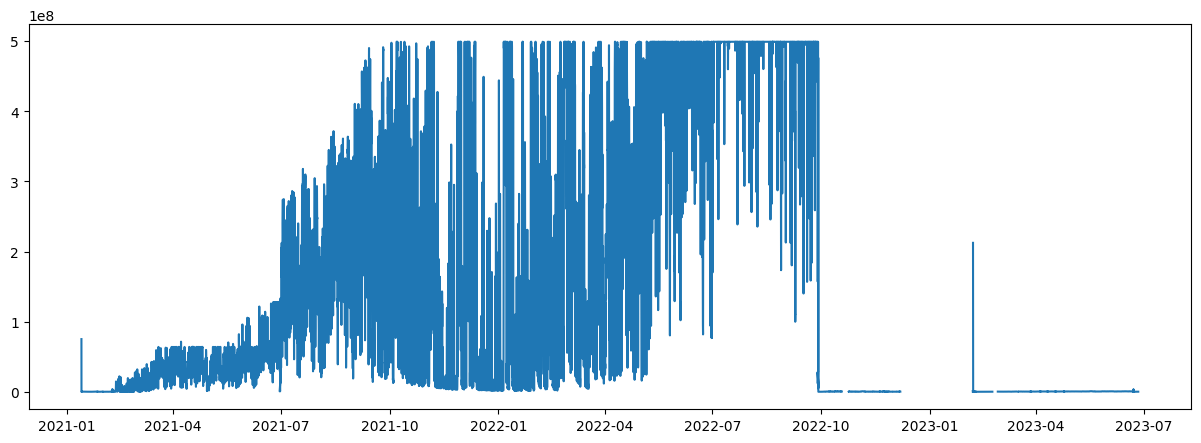

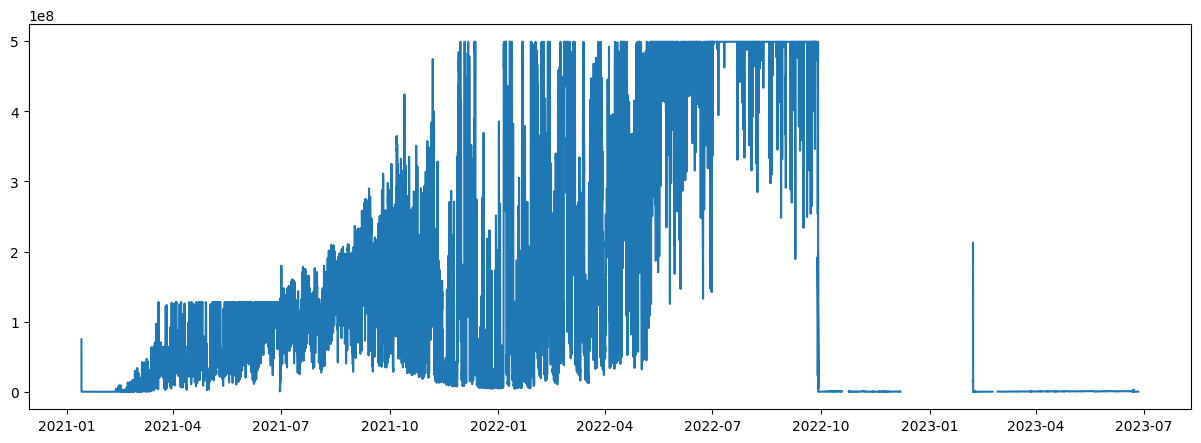

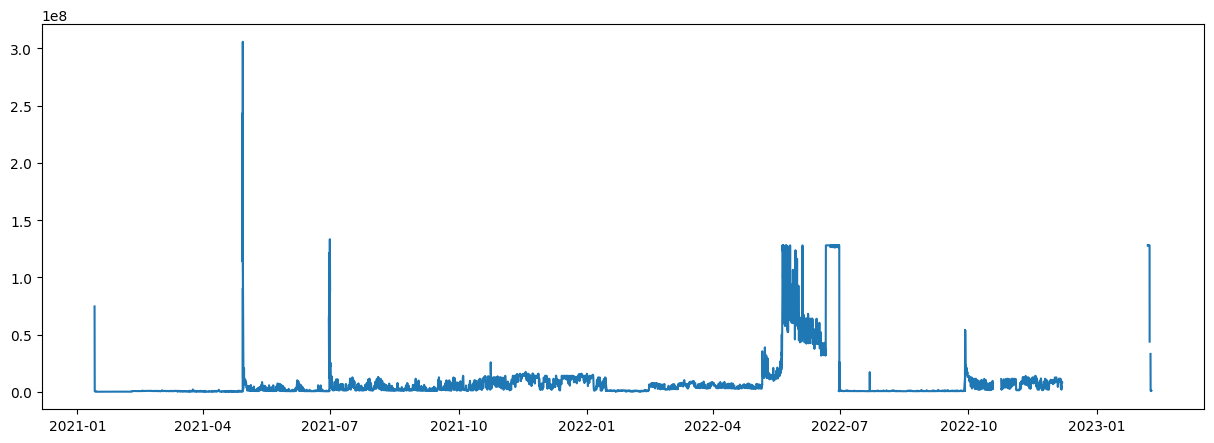

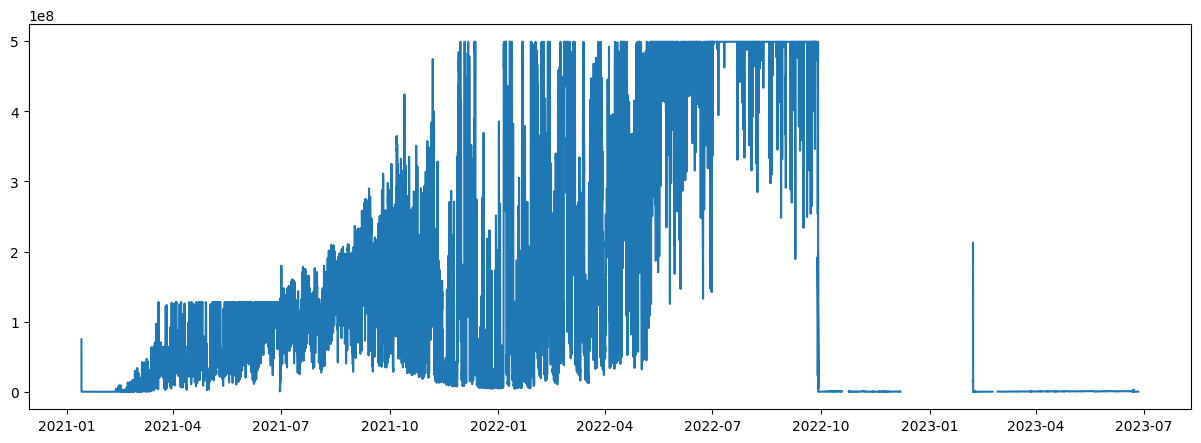

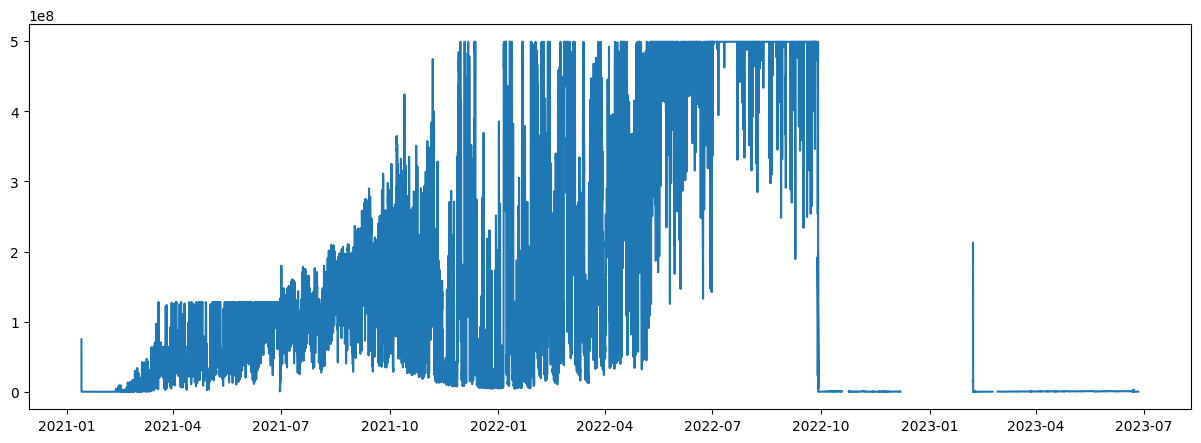

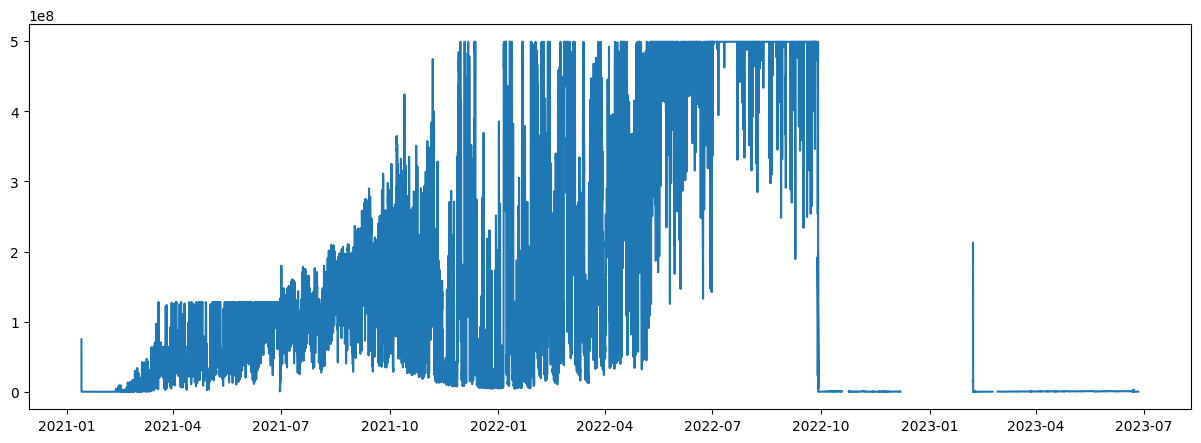

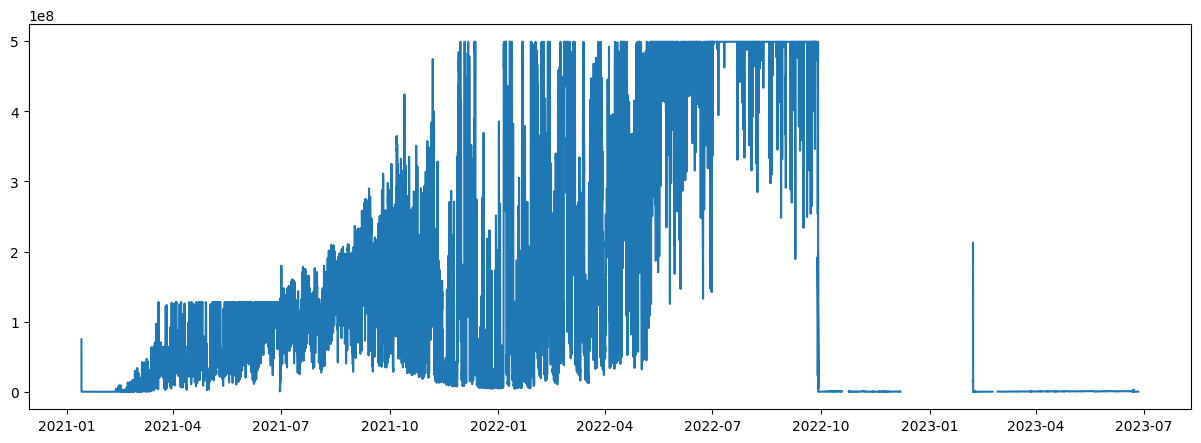

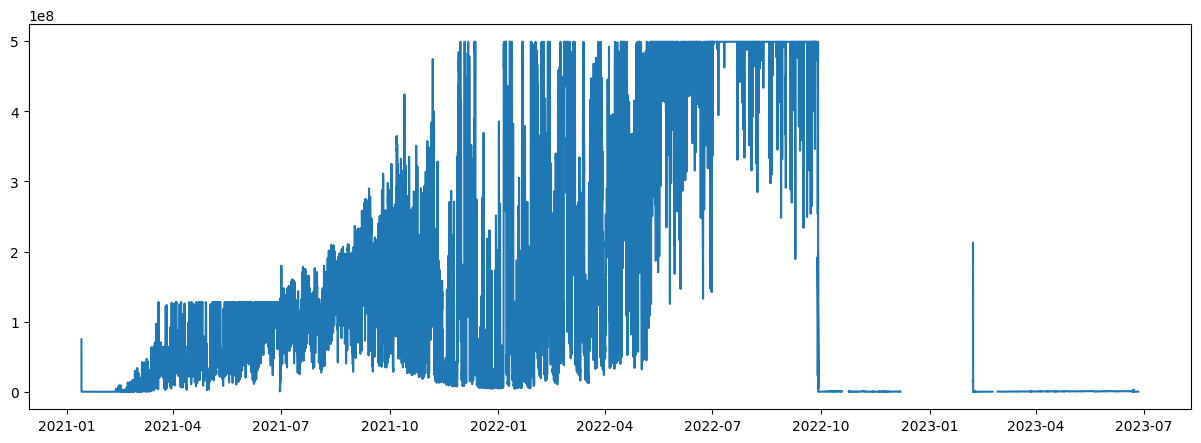

In [49]:
for i in sensors:
    fig = plt.figure(figsize=(15, 5))
    plt.plot(
        i.index,
        i.R
    )
    plt.show()

In [33]:
sensors[0].R

ts
2021-01-13 00:00:00+00:00              NaN
2021-01-13 01:00:00+00:00              NaN
2021-01-13 02:00:00+00:00              NaN
2021-01-13 03:00:00+00:00              NaN
2021-01-13 04:00:00+00:00              NaN
                                 ...      
2023-06-26 05:00:00+00:00    161625.094828
2023-06-26 06:00:00+00:00    162563.966667
2023-06-26 07:00:00+00:00    166067.916667
2023-06-26 08:00:00+00:00    171913.950000
2023-06-26 09:00:00+00:00    173276.166667
Name: R, Length: 24231, dtype: float64